## EDA ON NETFLIX DATASET

In this work, exploratory data analysis has been carried out to understand user behaviour to recommend titles appropriately
## **FEATURES:**

SHOW-ID - Unique id of each show (not much of a use for us in this notebook)

TYPE - The category of a show, can be either a Movie or a TV Show

TITLE - Name of the show

DIRECTOR - Name of the director(s) of the show

CAST - Name of the actor

COUNTRY - Name of countries the show is available to watch on Netflix

DATE ADDED - Date when the show was added on Netflix

RATING - Show rating on netflix given by users

RELEASE YEAR - Release year of the show

DURATION - Time duration of the show

LISTED IN - Genre of the show


## IMPORTING LIBRARIES



pandas - work with data in tabular representation.

numpy -  to round the data in the correlation matrix.

missingno - to visualize missing values in the data.

matplotlib, seaborn, plotly -  required for data visualization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

We are using "Netflix Movies and TV Shows" from https://www.kaggle.com/shivamb/netflix-shows

In [ ]:
netflix_data = pd.read_csv('/content/netflix_titles.csv')

netflix_data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#The Dimensions Of The Data:
netflix_data.shape

(8807, 12)

In [ ]:
#Features of the data:
netflix_data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Data type of the features
netflix_data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Information about the features
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#percentage of null values
netflix_data.isnull().sum()/(len(netflix_data))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#ANALYSIS:

## HOW CONTENT IS DISTRIBUTED:

In [ ]:
x=netflix_data["type"].value_counts().reset_index()
px.pie(x,values="type",names="index")


**So 69.6% content is Movies and 30.4% Content is TV-Shows**


# Most watched Genre

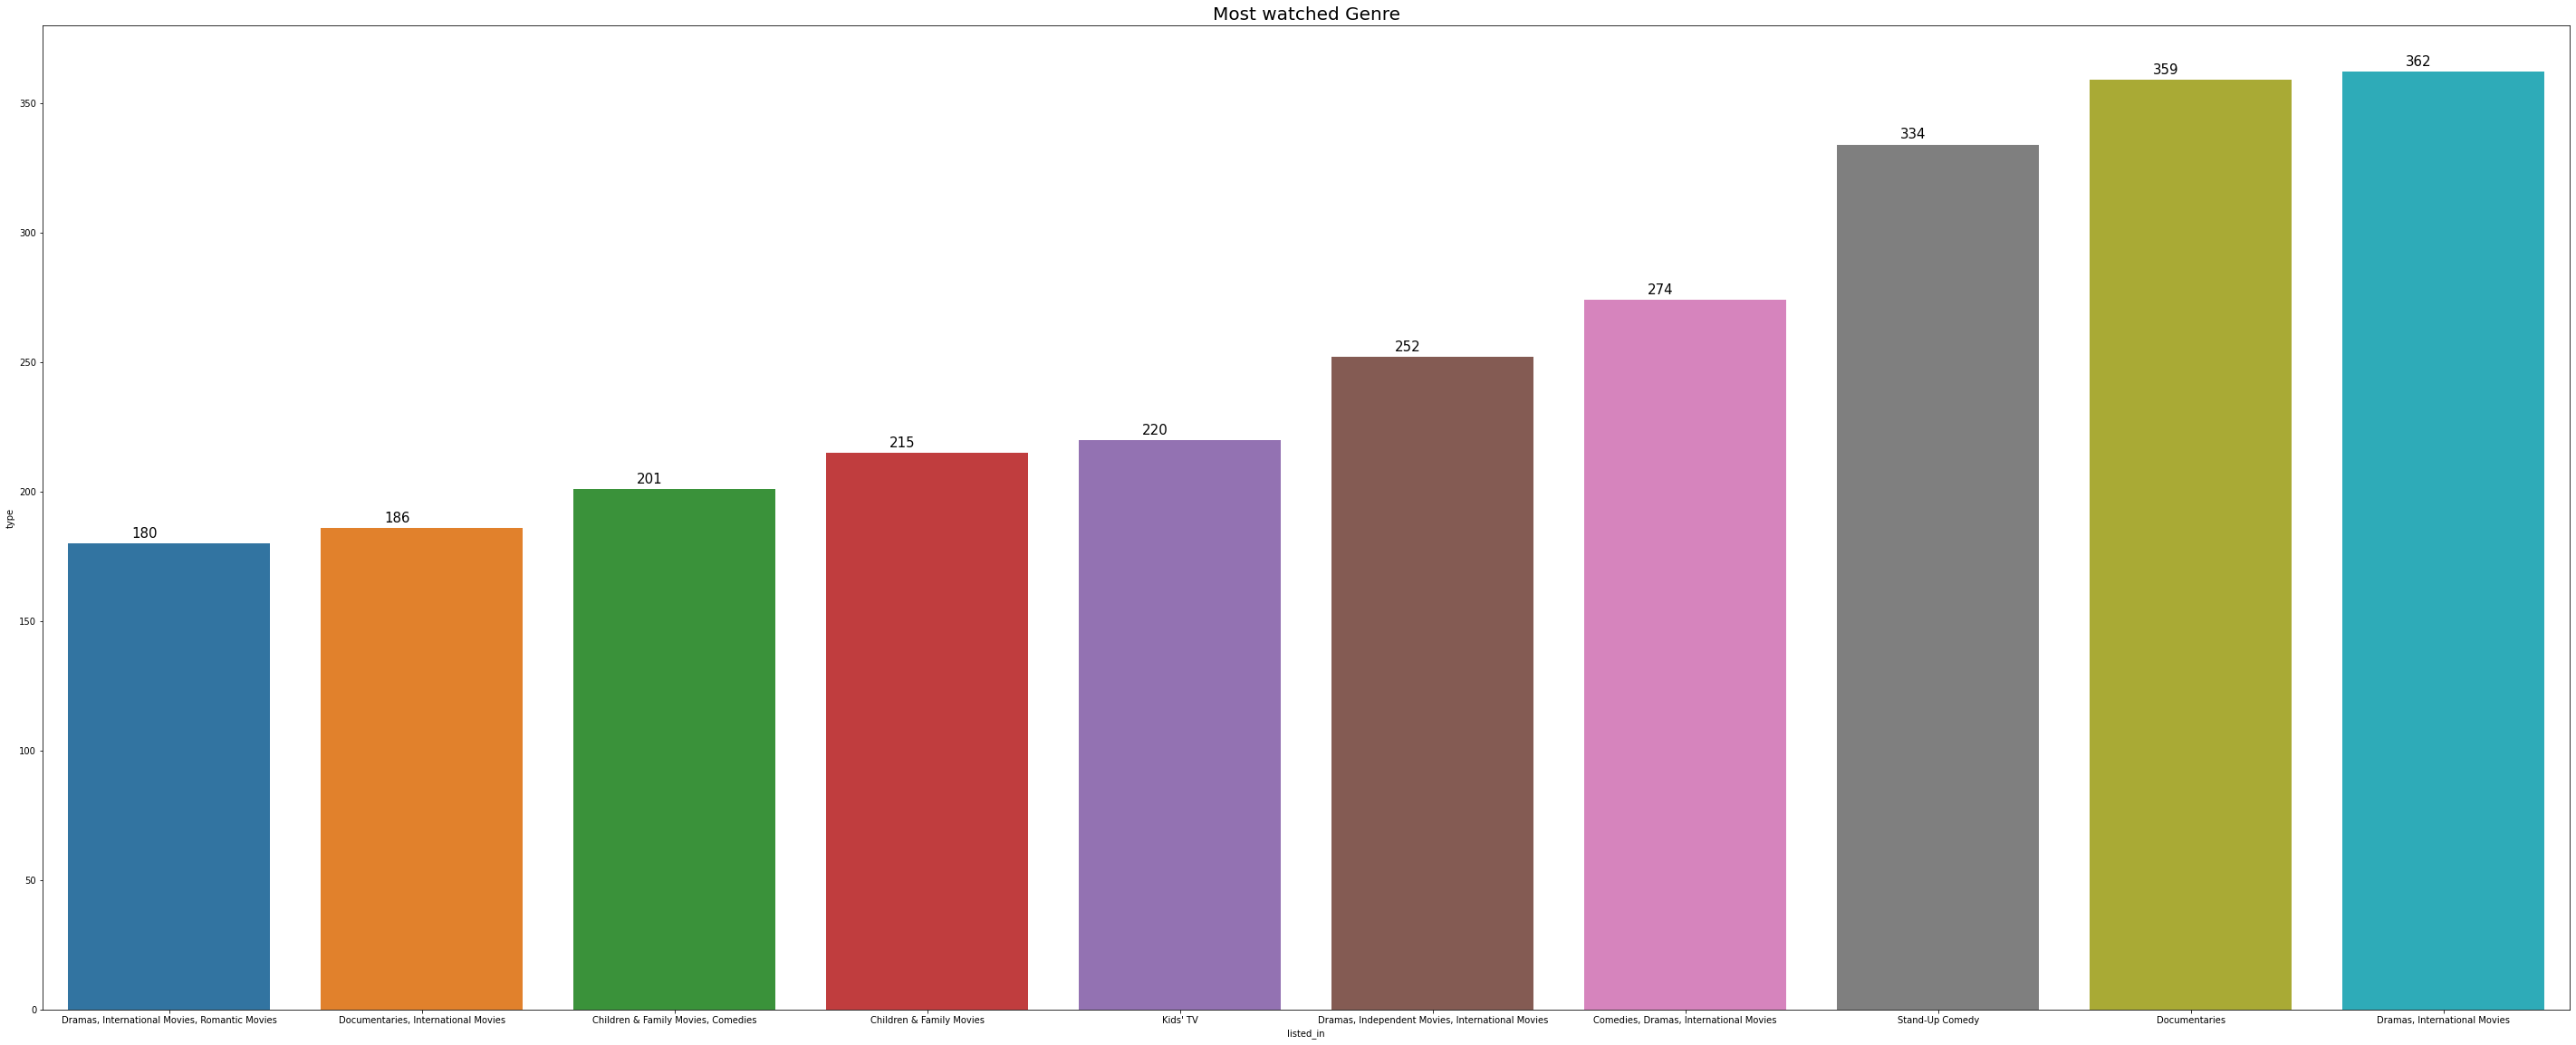

In [ ]:
countries=pd.crosstab(netflix_data["listed_in"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(50,20))
ax=sns.barplot(x=countries["listed_in"],y=countries["type"] )
plt.title("Most watched Genre",fontsize=20)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

**Drama and International Movies are most watched Genre**

#COUNTRIES WITH HIGHEST NUMBER OF MOVIES & TV-SHOWS:


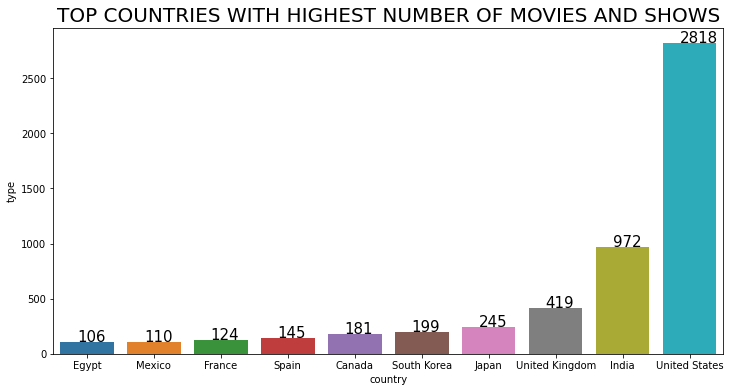

In [ ]:
countries=pd.crosstab(netflix_data["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("TOP COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

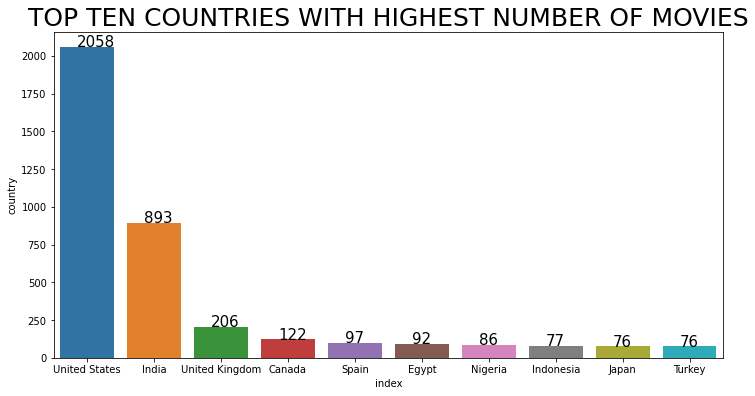

In [ ]:
m=netflix_data[netflix_data["type"]=="Movie"]
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

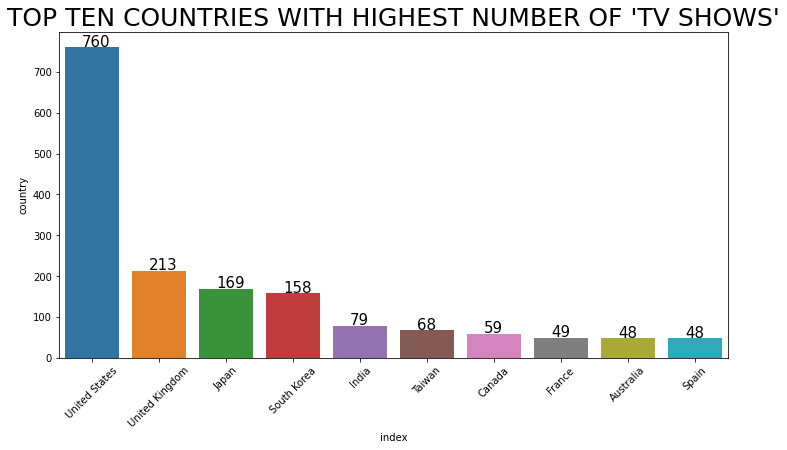

In [ ]:
m=netflix_data[netflix_data["type"]=='TV Show']
movies=m["country"].value_counts().reset_index()[0:10]
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF 'TV SHOWS'",fontsize=25)
ax=sns.barplot(x=movies["index"],y=movies["country"])
plt.xticks(rotation =45)
for i in ax.patches:
    ax.text(i.get_x()+.25,i.get_height()+2.3,str(int((i.get_height()))),
            rotation=0,fontsize=15,color='black')

**US has the highest number of Content Available**

# CONTENT ADDED OVERS YEARS

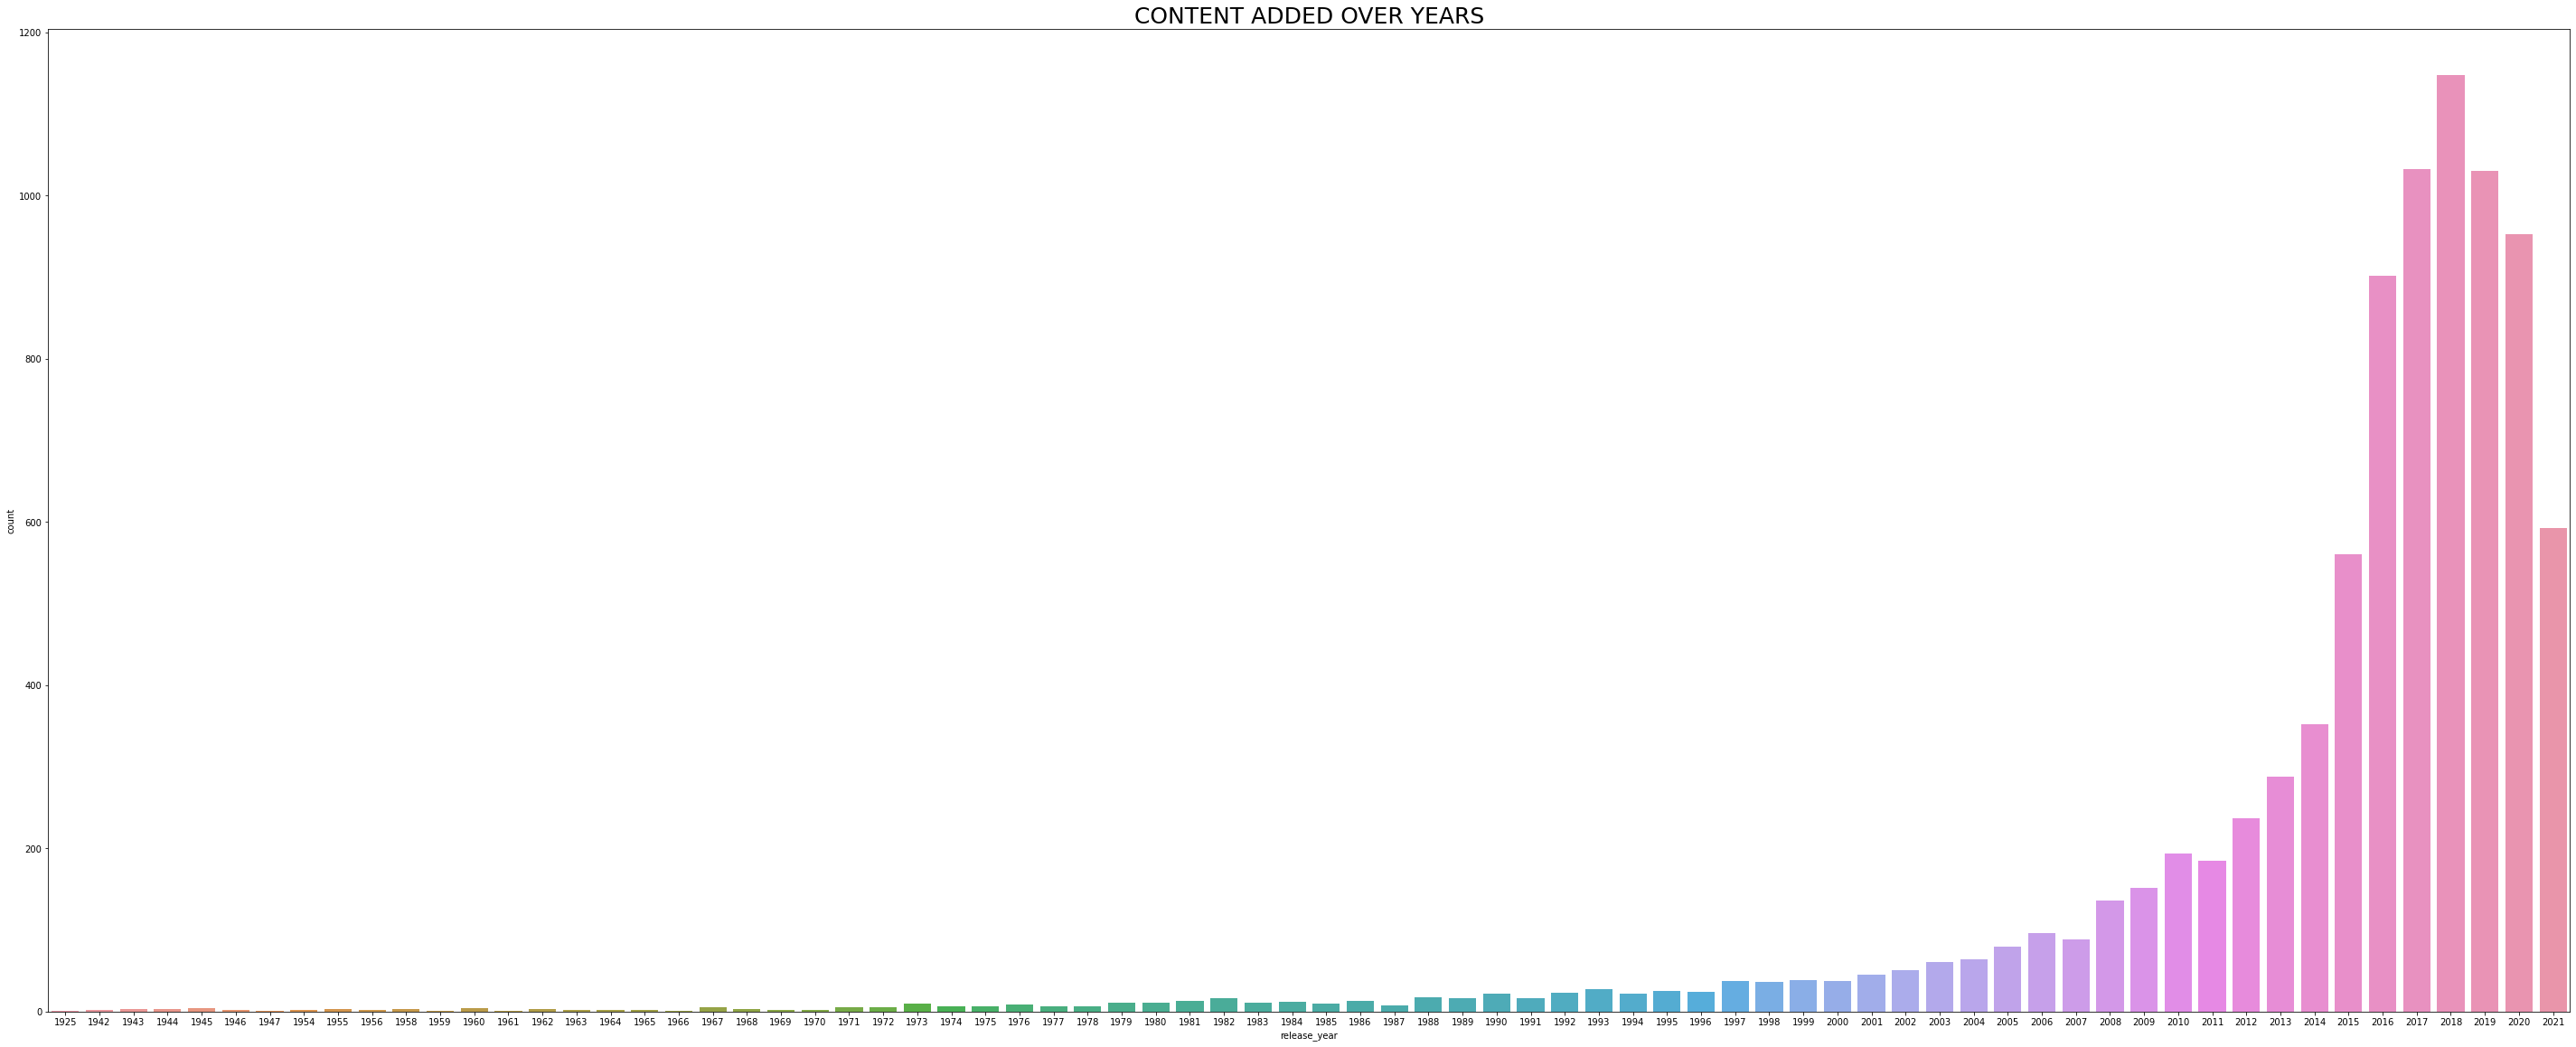

In [ ]:
plt.figure(figsize=(50,20))
sns.countplot(netflix_data["release_year"])
plt.title("CONTENT ADDED OVER YEARS",fontsize=25)
plt.show()

**Most movies and Tv-shows were added in the year of 2018**

# Number of viewers on the different days of the week

In [ ]:
netflix_data['date_added'] = netflix_data['date_added'].fillna(netflix_data['date_added'].mode()[0])

In [ ]:
#new dataframe with year in new column
date = pd.DataFrame(netflix_data['date_added'])
added = date['date_added'].str.split(', ',expand = True)
date['MD'] = added[0]
date['Year'] = added[1]
date.head()

,date_added,MD,Year
0,"September 25, 2021",September 25,2021
1,"September 24, 2021",September 24,2021
2,"September 24, 2021",September 24,2021
3,"September 24, 2021",September 24,2021
4,"September 24, 2021",September 24,2021


In [ ]:
def get_month(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[0]
    else:
        return mon[1]

In [ ]:
def get_day(row):
    mon = row['MD'].split(' ')
    if len(mon) == 2:
        return mon[1]
    else:
        return mon[2]

In [ ]:
# some of the Month-day combo was having ' November 1' extra space. So created a function to split the month and day from it and apply it on each row
date['Month'] = date.apply(get_month,axis=1)
date['Day'] = date.apply(get_day,axis=1)


In [ ]:
date = date.drop(['date_added','MD'], axis=1, errors='ignore')

In [ ]:
date.head()

,Year,Month,Day
0,2021,September,25
1,2021,September,24
2,2021,September,24
3,2021,September,24
4,2021,September,24


In [ ]:
netflix_data = pd.concat([netflix_data, date],axis=1)


In [ ]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
netflix_data['Month'] = netflix_data['Month'].map(d).astype('Int8')

In [ ]:
import datetime

def get_weekdays(x):
    t = datetime.datetime(int(x['Year']), int(x['Month']), int(x['Day']))
    return t.weekday()

netflix_data['WeekDay'] = netflix_data.apply(get_weekdays,axis=1)

In [ ]:
netflix_data['WeekDay'].value_counts()

4    2498
3    1396
2    1298
1    1197
0     851
5     816
6     751
Name: WeekDay, dtype: int64

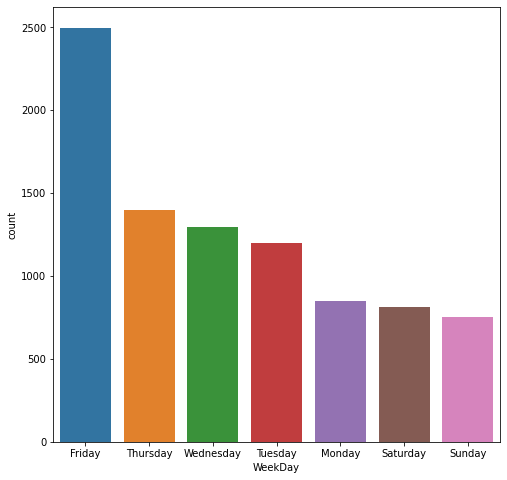

In [ ]:
plt.figure(figsize=(8,8))
d = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
x = netflix_data['WeekDay'].map(d)
sns.countplot(x,order = x.value_counts().index)

**Most of the users use netflix to watch TV-Show or Movies on Friday**

# Based on Rating

In [ ]:
px.pie(netflix_data,names="rating",values=netflix_data.index)

# Conclusion

From our EDA, we see that, most of the content in Netflix is movies, of which majority of it is generated from the United States. The top genres are Drama and International Movies. Most viewers use Netflix to watch Movies or TV-Shows on Fridays.